<a href="https://colab.research.google.com/github/SelvamathanS/Model-Training-using-pipeline/blob/main/ML_and_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing data***

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/Notes/Mr.Cooper (30.01.2026)/customer_tier_classification.csv")
d.head()

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
0,306,23,47.78,62.5,4,False,True,NaN,B,NaN,Android,Silver
1,622,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web,Gold
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze
4,171,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS,Bronze


# ***EDA (Exploratory Data Analysis)***

In [ ]:
d.shape

(1218, 12)

In [ ]:
d.isna().sum()

,0
id,0
age,0
income_k,90
credit_score,74
clicks_7d,0
is_premium,0
email_verified,7
city,48
segment,25
tenure_bucket,31


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1218 non-null   int64  
 1   age             1218 non-null   int64  
 2   income_k        1128 non-null   float64
 3   credit_score    1144 non-null   float64
 4   clicks_7d       1218 non-null   int64  
 5   is_premium      1218 non-null   bool   
 6   email_verified  1211 non-null   object 
 7   city            1170 non-null   object 
 8   segment         1193 non-null   object 
 9   tenure_bucket   1187 non-null   object 
 10  device          1218 non-null   object 
 11  tier            1218 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 106.0+ KB


## ***Finding Duplicate records count***

In [ ]:
d.nunique() # Finding duplicate records --> id=1200(unique) , total records= 1218 ==> 18 duplicate records

,0
id,1200
age,41
income_k,1025
credit_score,498
clicks_7d,15
is_premium,2
email_verified,2
city,26
segment,10
tenure_bucket,4


In [ ]:
d.shape[0] - d['id'].nunique()

18

In [ ]:
#or
print(d.duplicated().sum())

18


## ***Check Balanced or not***

In [ ]:
d['tier'].value_counts()

,count
tier,
Gold,415
Bronze,402
Silver,401


## ***Find range of numeric columns***

In [ ]:
r = max(d['age']) - min(d['age'])
r

43

In [ ]:
numerical_cols = ['age','income_k','credit_score','clicks_7d']
for i in numerical_cols:
  print("Range of ",i," : ", min(d[i])," - ",max(d[i]) )

Range of  age  :  18  -  61
Range of  income_k  :  6.73  -  939.31
Range of  credit_score  :  22.1  -  100.0
Range of  clicks_7d  :  0  -  14


# ***Visualizing***

<Axes: >

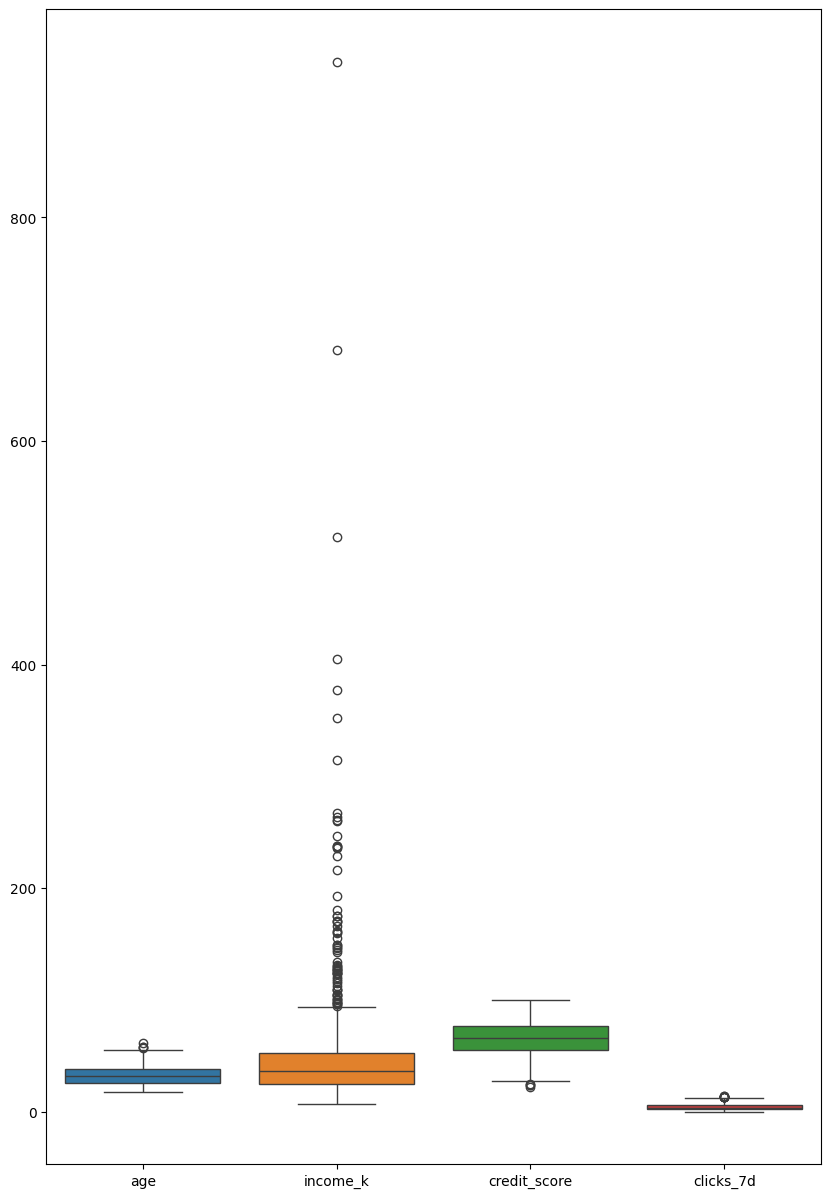

In [ ]:
#Plotting the range of columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,15))
sns.boxplot(data=d[numerical_cols])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income_k'}>],
       [<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'clicks_7d'}>]], dtype=object)

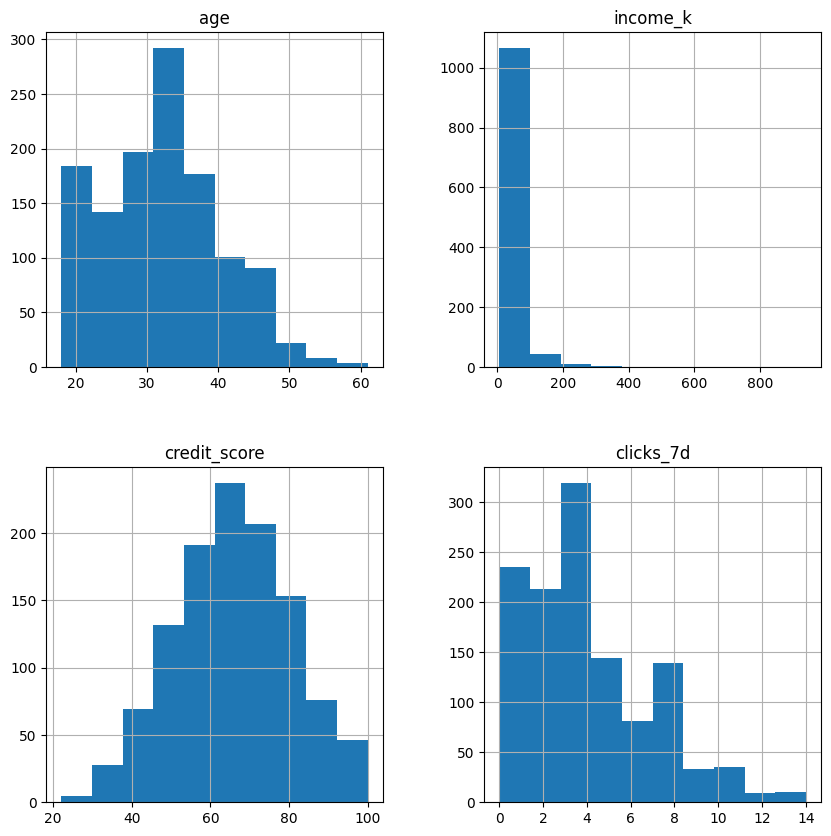

In [ ]:
d[numerical_cols].hist(figsize=(10,10))

<Axes: ylabel='Count'>

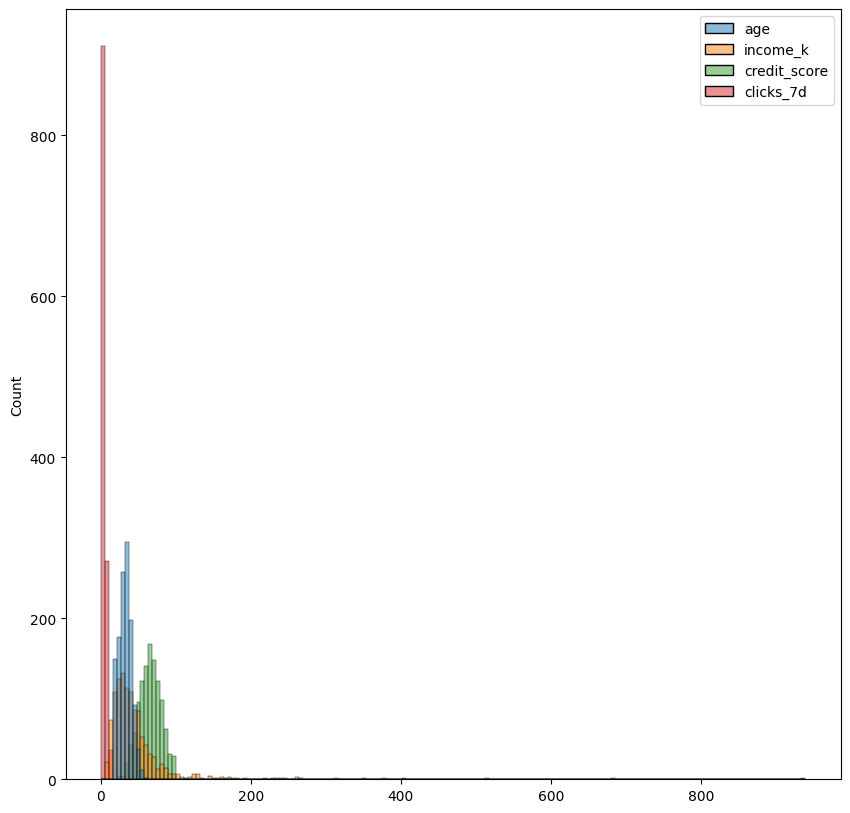

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=d[numerical_cols])

Counting number of values in specific columns

In [ ]:
d['age'].value_counts()

,count
age,
18,82
35,63
36,63
29,62
34,62
31,60
30,54
32,54
33,53


<Axes: xlabel='tier', ylabel='income_k'>

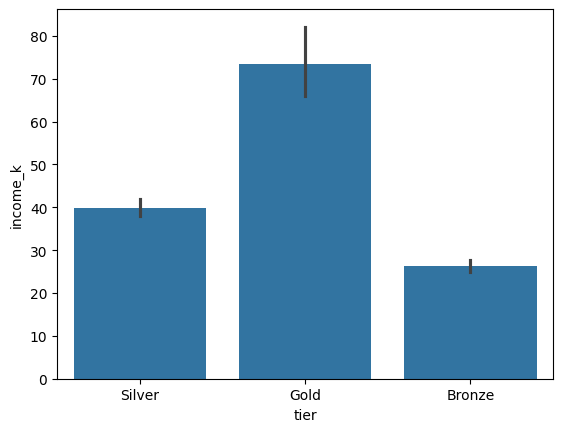

In [ ]:
#plot salary with tier for finding contributions
sns.barplot(data=d,x= 'tier',y='income_k')

<Axes: xlabel='device', ylabel='count'>

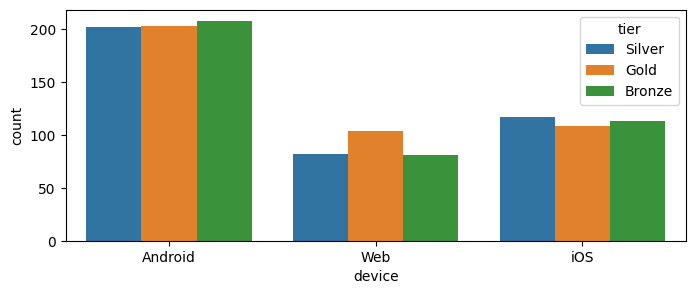

In [ ]:
#same like contributions
plt.figure(figsize=(8,3))
sns.countplot(hue='tier', x='device',data=d)

In [ ]:
#correleation matrix
corr = d[numerical_cols].corr()
corr

,age,income_k,credit_score,clicks_7d
age,1.000000,0.018501,-0.014086,-0.015570
income_k,0.018501,1.000000,-0.013063,-0.057686
credit_score,-0.014086,-0.013063,1.000000,0.007054
clicks_7d,-0.015570,-0.057686,0.007054,1.000000


<Axes: >

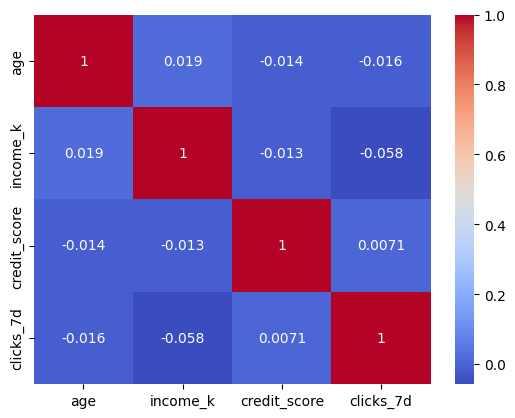

In [ ]:
#plotting correlation
sns.heatmap(corr,annot=True,cmap='coolwarm')

# ***Preprocessing to improve the correlation***

In [ ]:
#Encoding Categorical values
d1 = d.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in d1.columns:
  if d1[i].dtype == 'object':
    d1[i] = le.fit_transform(d1[i])

In [ ]:
#Correlation matrix
corr = d1.corr()
corr

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
id,1.000000,0.015688,0.010239,-0.014811,0.034828,-0.030813,0.014420,0.004020,-0.020964,0.018147,-0.029778,0.025293
age,0.015688,1.000000,0.018501,-0.014086,-0.015570,-0.036133,0.006138,-0.054101,-0.000615,0.048193,0.015277,-0.007458
income_k,0.010239,0.018501,1.000000,-0.013063,-0.057686,-0.020507,0.010009,-0.017399,0.023037,-0.012189,0.045449,0.101446
credit_score,-0.014811,-0.014086,-0.013063,1.000000,0.007054,0.017632,-0.035850,0.046913,0.029449,-0.037591,-0.014287,0.189668
clicks_7d,0.034828,-0.015570,-0.057686,0.007054,1.000000,-0.055619,0.027369,-0.045650,-0.050823,-0.053915,-0.036460,0.129583
is_premium,-0.030813,-0.036133,-0.020507,0.017632,-0.055619,1.000000,0.172505,-0.034303,-0.014577,0.058478,0.016228,0.037492
email_verified,0.014420,0.006138,0.010009,-0.035850,0.027369,0.172505,1.000000,0.008276,-0.009953,-0.001354,0.028017,-0.002796
city,0.004020,-0.054101,-0.017399,0.046913,-0.045650,-0.034303,0.008276,1.000000,0.027901,0.010172,-0.003509,0.015238
segment,-0.020964,-0.000615,0.023037,0.029449,-0.050823,-0.014577,-0.009953,0.027901,1.000000,-0.011726,0.025569,-0.035996
tenure_bucket,0.018147,0.048193,-0.012189,-0.037591,-0.053915,0.058478,-0.001354,0.010172,-0.011726,1.000000,-0.016602,0.002784


<Axes: >

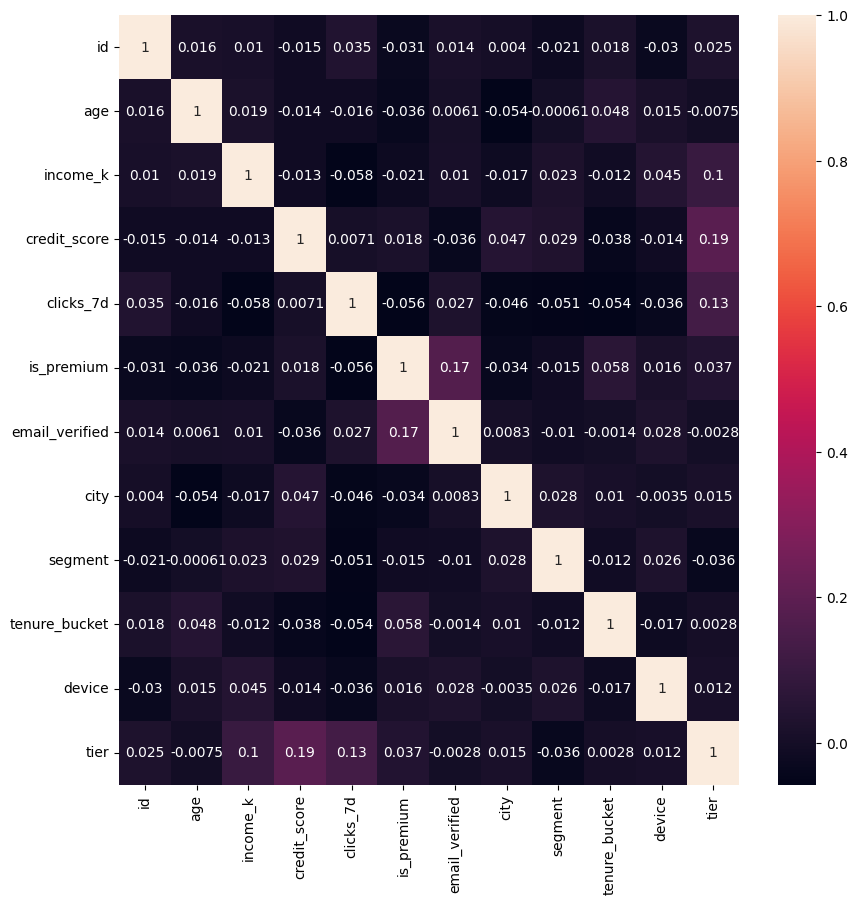

In [ ]:
#plotting correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
import numpy as np

corr_abs = corr.abs()
np.fill_diagonal(corr_abs.values, np.nan)
max_corr_value = corr_abs.max().max()
max_corr_columns = corr_abs.stack().idxmax()

print(f"Highest correlated value: {max_corr_value:.4f}")
print(f"Between columns: {max_corr_columns[0]} and {max_corr_columns[1]}")

Highest correlated value: 0.1897
Between columns: credit_score and tier


# ***preprocess the segment column***

In [ ]:
d['segment'].isna().sum()

np.int64(25)

In [ ]:
#fill null values with mode function
d['segment'] = d['segment'].fillna(d['segment'].mode()[0])
d['segment'].isna().sum()

np.int64(0)

In [ ]:
d['segment']

,segment
0,B
1,A
2,A
3,D
4,A
...,...
1213,C
1214,D
1215,D
1216,B


In [ ]:
# filling null values in all columns
for i in d.columns:
  if d[i].isna().sum() > 0:
    d[i] = d[i].fillna(d[i].mode()[0])

/tmp/ipython-input-1798450645.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d[i] = d[i].fillna(d[i].mode()[0])


# ***Splitting x, y***

In [ ]:
target = 'tier'
x= d.drop(columns=[target,'id'],errors ='ignore')
y=d[target]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1218 non-null   int64  
 1   income_k        1218 non-null   float64
 2   credit_score    1218 non-null   float64
 3   clicks_7d       1218 non-null   int64  
 4   is_premium      1218 non-null   bool   
 5   email_verified  1218 non-null   bool   
 6   city            1218 non-null   object 
 7   segment         1218 non-null   object 
 8   tenure_bucket   1218 non-null   object 
 9   device          1218 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(4)
memory usage: 78.6+ KB


In [ ]:
x['email_verified'] = x['email_verified'].astype(int)
x['is_premium'] = x['is_premium'].astype(int)

In [ ]:
num_cols = ['age', 'income_k', 'credit_score', 'clicks_7d']
bool_cols = [c for c in ['is_premium','email_verified'] if c in x.columns]
nominal_cols = [c for c in ['city','segment','device'] if c in x.columns]
ordinal_cols = [c for c in ['tenure_bucket'] if c in x.columns]

In [ ]:
print(num_cols)
print(bool_cols)
print(nominal_cols)
print(ordinal_cols)

['age', 'income_k', 'credit_score', 'clicks_7d']
['is_premium', 'email_verified']
['city', 'segment', 'device']
['tenure_bucket']


In [ ]:
d.isna().sum()

,0
id,0
age,0
income_k,0
credit_score,0
clicks_7d,0
is_premium,0
email_verified,0
city,0
segment,0
tenure_bucket,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1218 non-null   int64  
 1   income_k        1218 non-null   float64
 2   credit_score    1218 non-null   float64
 3   clicks_7d       1218 non-null   int64  
 4   is_premium      1218 non-null   int64  
 5   email_verified  1218 non-null   int64  
 6   city            1218 non-null   object 
 7   segment         1218 non-null   object 
 8   tenure_bucket   1218 non-null   object 
 9   device          1218 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 95.3+ KB


In [ ]:
#ordinal mapping for tenure
tenure_order = ['New','1-3y','3-5y','5+y']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

#preprocessing pipeline
num_pipe = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler(with_mean = True, with_std=True))
    ])
bool_pipe = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent'))
])

nominal_pipe = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output = False))
])

ordinal_pipe = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=[tenure_order]))
])

In [ ]:
preprocess = ColumnTransformer(
    transformers = [
        ('num',num_pipe,num_cols),
        ('bool',bool_pipe,bool_cols),
        ('nominal',nominal_pipe,nominal_cols),
        ('ordinal',ordinal_pipe,ordinal_cols)
    ],remainder = "drop")

# ***Train test split***

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(974, 10)

# ***Model pipeline (Logistic regression, Random Forest)***

***Logistic regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logreg_clf = Pipeline(
    steps = [
        ('preprocess',preprocess),
        ('classification',LogisticRegression(max_iter=1000, multi_class='multinomial'))
    ])

In [ ]:
logreg_clf.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income_k',
                                                   'credit_score',
                                                   'clicks_7d']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['is_premium',
                                                   'email_verified']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imp...
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['city', 'segment',
                                                   'device']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['New',
                                                                                               '1-3y',
                                                                                               '3-5y',
                                                                                               '5+y']]))]),
                                                  ['tenure_bucket'])])),
                ('classification',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [ ]:
logreg_clf.score(x_test,y_test)

0.6844262295081968

In [ ]:
logreg_clf.predict(x_test)

array(['Bronze', 'Bronze', 'Silver', 'Silver', 'Bronze', 'Gold', 'Bronze',
       'Silver', 'Gold', 'Bronze', 'Bronze', 'Silver', 'Bronze', 'Bronze',
       'Bronze', 'Silver', 'Gold', 'Silver', 'Silver', 'Bronze', 'Gold',
       'Silver', 'Gold', 'Silver', 'Bronze', 'Gold', 'Gold', 'Bronze',
       'Bronze', 'Gold', 'Gold', 'Gold', 'Bronze', 'Silver', 'Silver',
       'Gold', 'Gold', 'Silver', 'Gold', 'Gold', 'Gold', 'Silver',
       'Silver', 'Bronze', 'Silver', 'Gold', 'Bronze', 'Bronze', 'Bronze',
       'Silver', 'Gold', 'Bronze', 'Silver', 'Bronze', 'Silver', 'Silver',
       'Gold', 'Gold', 'Bronze', 'Bronze', 'Bronze', 'Gold', 'Bronze',
       'Bronze', 'Gold', 'Gold', 'Silver', 'Bronze', 'Gold', 'Bronze',
       'Gold', 'Gold', 'Bronze', 'Silver', 'Bronze', 'Silver', 'Bronze',
       'Gold', 'Silver', 'Gold', 'Gold', 'Silver', 'Silver', 'Bronze',
       'Gold', 'Bronze', 'Gold', 'Bronze', 'Bronze', 'Bronze', 'Bronze',
       'Bronze', 'Bronze', 'Bronze', 'Silver', 'Bronze', 'S

***Random Forest***

In [ ]:
rf_clf = Pipeline(
    steps = [
        ('preprocess',preprocess),
        ('classification',RandomForestClassifier())
    ])

In [ ]:
rf_clf.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income_k',
                                                   'credit_score',
                                                   'clicks_7d']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['is_premium',
                                                   'email_verified']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imp...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['city', 'segment',
                                                   'device']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['New',
                                                                                               '1-3y',
                                                                                               '3-5y',
                                                                                               '5+y']]))]),
                                                  ['tenure_bucket'])])),
                ('classification', RandomForestClassifier())])

In [ ]:
rf_clf.score(x_test,y_test)

0.6680327868852459

In [ ]:
rf_clf.predict(x_test)

array(['Bronze', 'Bronze', 'Silver', 'Gold', 'Bronze', 'Gold', 'Bronze',
       'Bronze', 'Gold', 'Bronze', 'Bronze', 'Silver', 'Bronze', 'Silver',
       'Bronze', 'Bronze', 'Gold', 'Silver', 'Bronze', 'Bronze', 'Gold',
       'Gold', 'Gold', 'Silver', 'Bronze', 'Gold', 'Gold', 'Bronze',
       'Bronze', 'Gold', 'Gold', 'Gold', 'Bronze', 'Gold', 'Silver',
       'Gold', 'Gold', 'Silver', 'Gold', 'Gold', 'Silver', 'Bronze',
       'Silver', 'Bronze', 'Silver', 'Gold', 'Bronze', 'Bronze', 'Bronze',
       'Bronze', 'Silver', 'Bronze', 'Gold', 'Silver', 'Silver', 'Bronze',
       'Silver', 'Gold', 'Bronze', 'Bronze', 'Bronze', 'Gold', 'Bronze',
       'Bronze', 'Bronze', 'Gold', 'Silver', 'Bronze', 'Silver', 'Bronze',
       'Gold', 'Gold', 'Bronze', 'Silver', 'Bronze', 'Silver', 'Bronze',
       'Silver', 'Silver', 'Gold', 'Gold', 'Silver', 'Silver', 'Bronze',
       'Gold', 'Bronze', 'Gold', 'Silver', 'Silver', 'Bronze', 'Bronze',
       'Silver', 'Bronze', 'Bronze', 'Silver', 'Bronze'

# ***Confusion Matrix***

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logreg_clf.predict(x_test))
cm

array([[66,  3, 12],
       [ 0, 54, 21],
       [20, 21, 47]])